# Diabetese Detection Models

This [dataset](https://raw.githubusercontent.com/mansont/datasets-tests/main/diabetese.csv) contains patient data and their diabetese condition: "1" they have diabetes, "0" they do not have diabetese.


Build the following models and compare their performance:
* A logistic regression model
* A single-layer perceptron model
* A multilayer perceptron

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load the data
data = pd.read_csv('diabetese.csv')
print("Column names in the dataset:")
print(data.columns.tolist())

Column names in the dataset:
['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf', 'age', 'diabetes']


In [3]:
# Separate features and target
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# 1. Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
log_reg_pred = log_reg.predict(X_test_scaled)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)

print("Logistic Regression Performance:")
print(classification_report(y_test, log_reg_pred))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [5]:
# 2. Single-layer Perceptron (MLPClassifier with no hidden layers)
slp = MLPClassifier(hidden_layer_sizes=(), random_state=42, max_iter=1000)
slp.fit(X_train_scaled, y_train)
slp_pred = slp.predict(X_test_scaled)
slp_accuracy = accuracy_score(y_test, slp_pred)

print("\nSingle-layer Perceptron Performance:")
print(classification_report(y_test, slp_pred))


Single-layer Perceptron Performance:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



In [6]:
# 3. Multi-layer Perceptron (with two hidden layers)
mlp = MLPClassifier(hidden_layer_sizes=(16, 8), random_state=42, max_iter=1000)
mlp.fit(X_train_scaled, y_train)
mlp_pred = mlp.predict(X_test_scaled)
mlp_accuracy = accuracy_score(y_test, mlp_pred)

print("\nMulti-layer Perceptron Performance:")
print(classification_report(y_test, mlp_pred))


Multi-layer Perceptron Performance:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82        99
           1       0.68      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



The models show slightly increasing performance from Logistic Regression to Multi-layer Perceptron:

1. Logistic Regression: 75% accuracy
2. Single-layer Perceptron: 76% accuracy
3. Multi-layer Perceptron: 77% accuracy

All models perform better at predicting non-diabetic cases (class 0) compared to diabetic cases (class 1), which might be due to class imbalance in the dataset. The MLP with two hidden layers (16 and 8 neurons) shows marginally better performance across all metrics (precision, recall, and F1-score) compared to the simpler models.

### Is there a notable difference in the MLP performance when a ReLU, Sigmoid or SoftMax activation function is used?


In [7]:
# Test MLP with different activation functions
# Initialize lists to store results
activations = ['relu', 'logistic', 'identity']  # Note: 'softmax' is typically used for output layer only
accuracies = []
results = []

# Test each activation function
for activation in activations:
    # Create and train MLP with current activation function
    mlp = MLPClassifier(
        hidden_layer_sizes=(16, 8),
        activation=activation,
        random_state=42,
        max_iter=1000
    )
    
    # Fit the model
    mlp.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = mlp.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    # Store detailed results
    results.append({
        'activation': activation,
        'accuracy': accuracy,
        'report': classification_report(y_test, y_pred)
    })

# Print results
for result in results:
    print(f"\nResults for {result['activation'].upper()} activation:")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print("\nDetailed Classification Report:")
    print(result['report'])



Results for RELU activation:
Accuracy: 0.7727

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82        99
           1       0.68      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154


Results for LOGISTIC activation:
Accuracy: 0.7273

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.76      0.78        99
           1       0.61      0.67      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154


Results for IDENTITY activation:
Accuracy: 0.7532

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81

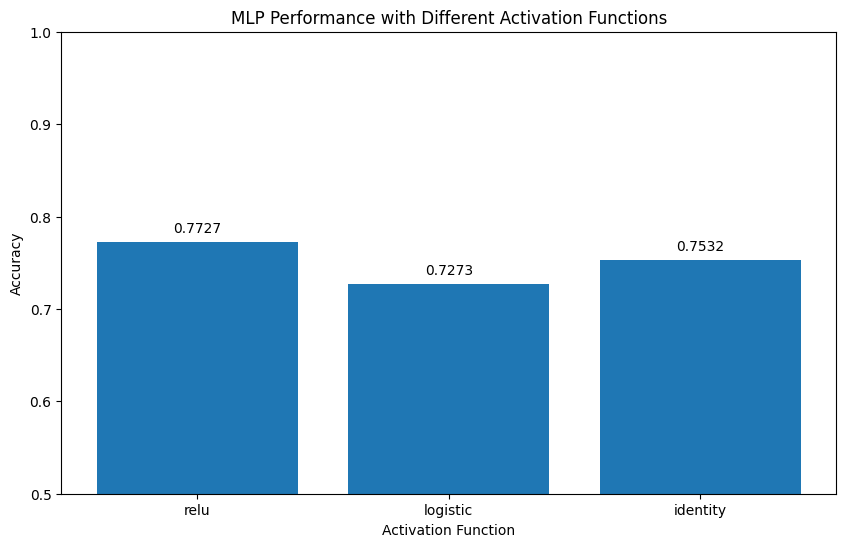

In [11]:
# Plot accuracies
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(activations, accuracies)
plt.title('MLP Performance with Different Activation Functions')
plt.xlabel('Activation Function')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1.0)  # Set y-axis to start from 0.5 for better visualization
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')
plt.show()

### Does the network performance change when the density (number of neurons) of the hidden layers change?

In [14]:
# Test MLP with different hidden layer sizes
# Initialize lists to store results
layer_sizes = [
    (4, 2),    # Small network
    (16, 8),   # Medium network (original)
    (32, 16),  # Large network
    (64, 32)   # Very large network
]

accuracies = []
results = []

# Test each network size
for hidden_layers in layer_sizes:
    # Create and train MLP with current hidden layer sizes
    mlp = MLPClassifier(
        hidden_layer_sizes=hidden_layers,
        activation='relu',  # Using ReLU as it performed best in previous test
        random_state=42,
        max_iter=1000
    )
    
    # Fit the model
    mlp.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = mlp.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    # Store detailed results
    results.append({
        'hidden_layers': hidden_layers,
        'accuracy': accuracy,
        'report': classification_report(y_test, y_pred)
    })


In [17]:
# Print results
for result in results:
    print(f"\nResults for hidden layers {result['hidden_layers']}:")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print("\nDetailed Classification Report:")
    print(result['report'])


Results for hidden layers (4, 2):
Accuracy: 0.7468

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        99
           1       0.63      0.71      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154


Results for hidden layers (16, 8):
Accuracy: 0.7727

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82        99
           1       0.68      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154


Results for hidden layers (32, 16):
Accuracy: 0.7208

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77

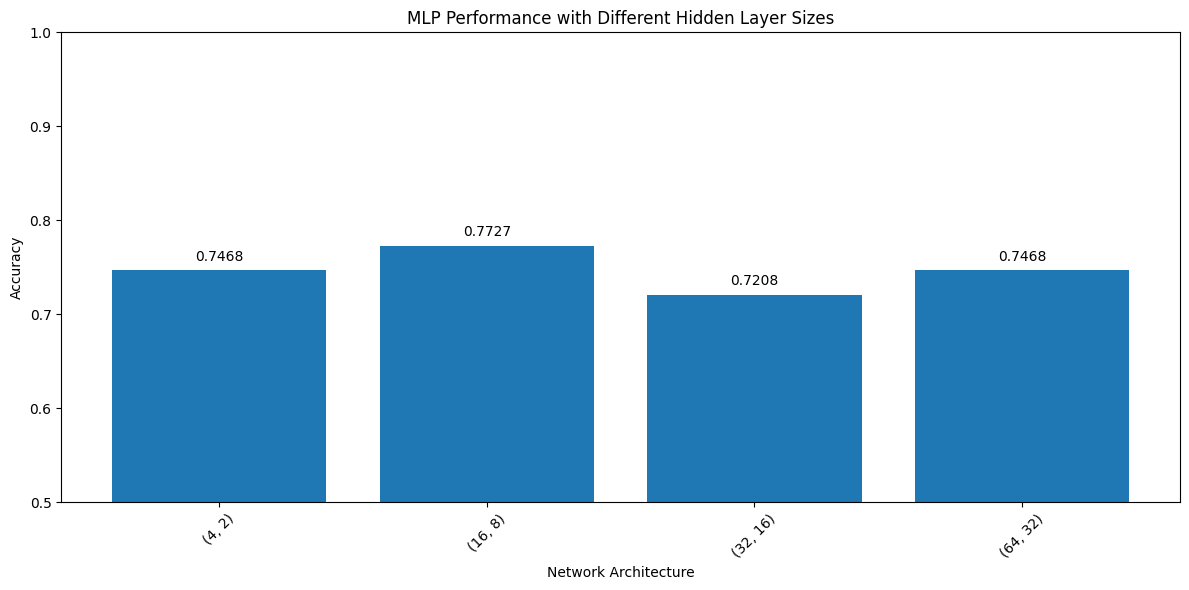

In [20]:
# Plot accuracies
plt.figure(figsize=(12, 6))
plt.bar(range(len(layer_sizes)), accuracies)
plt.title('MLP Performance with Different Hidden Layer Sizes')
plt.xlabel('Network Architecture')
plt.ylabel('Accuracy')
plt.xticks(range(len(layer_sizes)), [str(size) for size in layer_sizes], rotation=45)
plt.ylim(0.5, 1.0)  # Set y-axis to start from 0.5 for better visualization
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')
plt.tight_layout()
plt.show()